In [1]:
import mdtraj as md
import numpy as np
import os
from matplotlib import pyplot as plt

In [15]:
5100*4

20400

In [2]:
z_viral_mb_upper_10_old = np.zeros((10,2001))
z_viral_mb_lower_10_old = np.zeros((10,2001))

z_cell_mb_upper_10_old = np.zeros((10,2001))
z_cell_mb_lower_10_old = np.zeros((10,2001))


z_viral_mb_upper_10 = np.zeros((10,2001))
z_viral_mb_lower_10 = np.zeros((10,2001))

z_cell_mb_upper_10 = np.zeros((10,2001))
z_cell_mb_lower_10 = np.zeros((10,2001))

helix_cg_10_x = np.zeros((10,3,2001))
helix_cg_10_y = np.zeros((10,3,2001))
helix_cg_10_z = np.zeros((10,3,2001))


for i in range(10):
    path = 'run%d/'%(i+1)
    traj = md.load_xtc('%ssys_hydro_run_promb.xtc'%path, top = 'promb.gro')
    xyz = traj.xyz
    top = traj.topology
    table, bonds = top.to_dataframe()
    
    x_dppc = xyz[:,table.name == 'PO4',0]
    y_dppc = xyz[:,table.name == 'PO4',1]
    z_dppc = xyz[:,table.name == 'PO4',2]
    

    fp1_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[0]
    fp2_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[4]
    fp3_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[8]
    
    fp1_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[0]
    fp2_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[3]
    fp3_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[6]
    
    xyz_fp1 = xyz[:,(table.serial>=fp1_start)&(table.serial<=fp1_end),:]
    xyz_fp2 = xyz[:,(table.serial>=fp2_start)&(table.serial<=fp2_end),:]
    xyz_fp3 = xyz[:,(table.serial>=fp3_start)&(table.serial<=fp3_end),:]
    
    xyz_tm = np.mean(xyz[:,(table.name=='BB')&(table.resSeq==1214-815),:],axis=1)
    
    z_viral_midplane = np.zeros(len(z_dppc))
    z_viral_mb_upper = np.zeros(len(z_dppc))
    z_viral_mb_lower = np.zeros(len(z_dppc))

    z_cell_midplane = np.zeros(len(z_dppc))
    z_cell_mb_upper = np.zeros(len(z_dppc))
    z_cell_mb_lower = np.zeros(len(z_dppc))
    
    z_viral_midplane_old = np.zeros(len(z_dppc))
    z_viral_mb_upper_old = np.zeros(len(z_dppc))
    z_viral_mb_lower_old = np.zeros(len(z_dppc))

    z_cell_midplane_old = np.zeros(len(z_dppc))
    z_cell_mb_upper_old = np.zeros(len(z_dppc))
    z_cell_mb_lower_old = np.zeros(len(z_dppc))

    helix_cg_xyz = np.zeros((3,len(z_dppc),3))
    helix_cg_xyz[0,:,:] = np.mean(xyz_fp1, axis=1)
    helix_cg_xyz[1,:,:] = np.mean(xyz_fp2, axis=1)
    helix_cg_xyz[2,:,:] = np.mean(xyz_fp3, axis=1)
    
    nearest_fp = np.argmax(helix_cg_xyz[:,:,2],axis=0)
    
    for j in range(len(z_dppc)):
        
        temp = z_dppc[j,:]

        viral_mb = temp[temp<25]
        z_viral_midplane_old[j] = np.mean(viral_mb)
        z_viral_mb_upper_old[j] = np.mean(viral_mb[viral_mb>z_viral_midplane_old[j]])
        z_viral_mb_lower_old[j] = np.mean(viral_mb[viral_mb<z_viral_midplane_old[j]]) 

        cell_mb = temp[temp>25]
        z_cell_midplane_old[j] = np.mean(cell_mb)
        z_cell_mb_upper_old[j] = np.mean(cell_mb[cell_mb>z_cell_midplane_old[j]])
        z_cell_mb_lower_old[j] = np.mean(cell_mb[cell_mb<z_cell_midplane_old[j]])
    
    for j in range(len(z_dppc)):
        
        temp = z_dppc[j,:]
        temp_x = x_dppc[j,:]
        temp_y = y_dppc[j,:]
        x_fp = helix_cg_xyz[nearest_fp[j],j,0]
        y_fp = helix_cg_xyz[nearest_fp[j],j,1]
        x_box = traj.unitcell_lengths[j,0]
        y_box = traj.unitcell_lengths[j,1]
        temp = temp[(((temp_x > x_fp -3.5)&(temp_x < x_fp + 3.5))|((temp_x > x_fp+x_box -3.5)&(temp_x < x_fp+x_box + 3.5))|((temp_x > x_fp-x_box -3.5)&(temp_x < x_fp-x_box + 3.5)))&(((temp_y > y_fp -3.5)&(temp_y < y_fp + 3.5))|((temp_y > y_fp+y_box -3.5)&(temp_y < y_fp+y_box + 3.5))|((temp_y > y_fp-y_box -3.5)&(temp_y < y_fp-y_box + 3.5)))]

        viral_mb = temp[temp<25]
        z_viral_midplane[j] = np.mean(viral_mb)
        z_viral_mb_upper[j] = np.mean(viral_mb[viral_mb>z_viral_midplane[j]])
        z_viral_mb_lower[j] = np.mean(viral_mb[viral_mb<z_viral_midplane[j]]) 

        cell_mb = temp[temp>25]
        z_cell_midplane[j] = np.mean(cell_mb)
        z_cell_mb_upper[j] = np.mean(cell_mb[cell_mb>z_cell_midplane[j]])
        z_cell_mb_lower[j] = np.mean(cell_mb[cell_mb<z_cell_midplane[j]])
    
    z_viral_mb_upper_10[i,:] = z_viral_mb_upper
    z_viral_mb_lower_10[i,:] = z_viral_mb_lower

    z_cell_mb_upper_10[i,:] = z_cell_mb_upper
    z_cell_mb_lower_10[i,:] = z_cell_mb_lower

    helix_cg_10_x[i,:,:] = helix_cg_xyz[:,:,0] - xyz_tm[:,0]
    helix_cg_10_y[i,:,:] = helix_cg_xyz[:,:,1] - xyz_tm[:,1]
    helix_cg_10_z[i,:,:] = helix_cg_xyz[:,:,2]
    
    

In [3]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

Text(0, 0.5, 'z (nm)')

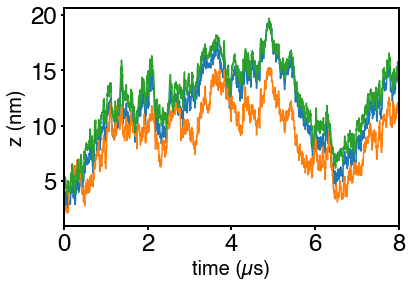

In [4]:
i=6
#plt.figure(figsize=(15,5))
#plt.plot(np.arange(len(z_dppc))*4/1000,z_viral_mb_lower_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_viral_mb_upper_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_lower_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_upper_10[i,:],'k')
plt.plot(np.arange(len(z_dppc))*4/1000,-helix_cg_10_z[i,0,:].T + z_cell_mb_lower_10[i,:])
plt.plot(np.arange(len(z_dppc))*4/1000,-helix_cg_10_z[i,1,:].T + z_cell_mb_lower_10[i,:])
plt.plot(np.arange(len(z_dppc))*4/1000,-helix_cg_10_z[i,2,:].T + z_cell_mb_lower_10[i,:])
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_lower_10[i,:]-2*1.52,'b')
plt.xlim([0,8])
#plt.ylim([0,35])
plt.xlabel('time (µs)')
plt.ylabel('z (nm)')


In [5]:
helix_cg_10 = helix_cg_10_z.copy()

In [6]:
trunc = 501
helix_cg_10_cali = helix_cg_10[:,:,trunc:].copy()
helix_cg_10_cali2 = helix_cg_10[:,0,trunc:].copy()
helix_cg_10_cali0 = helix_cg_10[:,0,:].copy()
for i in range(10):
    helix_cg_10_cali[i,:,:] = np.mean(z_cell_mb_lower_10[i,trunc:]) - helix_cg_10[i,:,trunc:]
    helix_cg_10_cali2[i,:] = np.mean(z_cell_mb_lower_10[i,trunc:]) - np.max(helix_cg_10[i,:,trunc:],axis=0)
    helix_cg_10_cali0[i,:] = np.mean(z_cell_mb_lower_10[i,:]) - np.max(helix_cg_10[i,:,:],axis=0)

array([[13.64314763, 13.68219678, 13.81552808, ...,  7.98695676,
         8.03457562,  7.85219685],
       [ 9.68151055, 10.26198731, 10.11674653, ...,  2.867231  ,
         2.9981762 ,  3.06389199],
       [ 4.3644437 ,  4.26635067,  3.98634617, ...,  8.7820615 ,
         8.64777843,  8.65349285],
       ...,
       [ 9.98425939, 10.07616117, 10.73901822, ..., 12.59663846,
        12.94139936, 13.38711621],
       [ 3.75586185,  3.97776088,  4.4901472 , ...,  2.29681071,
         2.43252429,  2.40871677],
       [ 4.26890823,  3.9141433 ,  3.41938278, ...,  3.77890465,
         3.93557426,  3.76509735]])

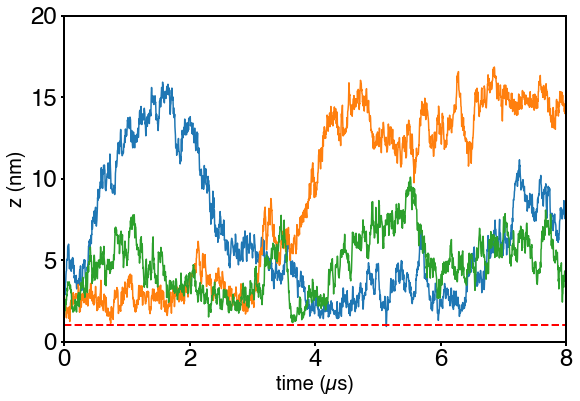

In [7]:
plt.figure(figsize=(9,6))
#plt.plot(np.arange(len(z_dppc))*4/1000,z_viral_mb_lower_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_viral_mb_upper_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_lower_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_upper_10[i,:],'k')
plt.plot(np.arange(len(helix_cg_10_cali0[0,:]))*4/1000,helix_cg_10_cali0[0,:])
plt.plot(np.arange(len(helix_cg_10_cali0[0,:]))*4/1000,helix_cg_10_cali0[4,:])
plt.plot(np.arange(len(helix_cg_10_cali0[0,:]))*4/1000,helix_cg_10_cali0[9,:])
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_lower_10[i,:]-2*1.52,'b')
plt.xlim([0,8])
plt.ylim([0,20])
plt.plot([0,8],[1,1],'r--',lw=2)
plt.xlabel('time (µs)')
plt.ylabel('z (nm)')
#plt.fill_between(np.arange(len(helix_cg_10_cali0[0,:]))*4/1000, np.zeros(len(helix_cg_10_cali0[0,:])), np.ones(len(helix_cg_10_cali0[0,:]))*1.6,color = 'r',alpha = 0.5)

helix_cg_10_cali2

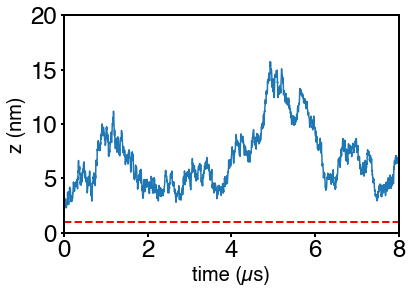

In [11]:
k = 5
plt.plot(np.arange(len(helix_cg_10_cali0[k,:]))*4/1000,helix_cg_10_cali0[k,:])
plt.xlim([0,8])
plt.ylim([0,20])
plt.xlabel('time (µs)')
plt.ylabel('z (nm)')
plt.plot([0,8],[1,1],'r--',lw=2)



In [23]:
i=0

Text(0, 0.5, 'x (nm)')

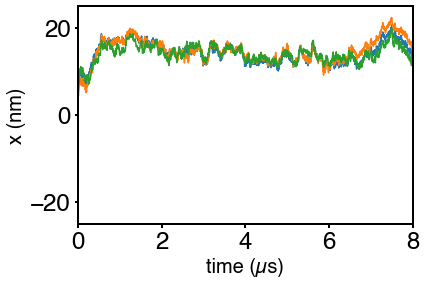

In [24]:
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_x[i,0,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_x[i,1,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_x[i,2,:].T)
plt.xlim([0,8])
plt.ylim([-25,25])
plt.xlabel('time (µs)')
plt.ylabel('x (nm)')

Text(0, 0.5, 'y (nm)')

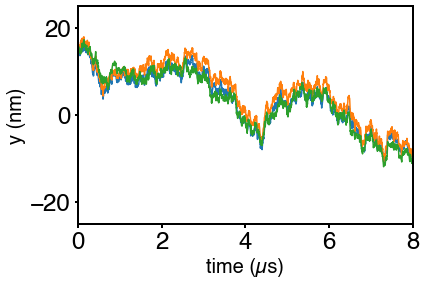

In [25]:
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_y[i,0,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_y[i,1,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_y[i,2,:].T)


plt.xlim([0,8])
plt.ylim([-25,25])

plt.xlabel('time (µs)')
plt.ylabel('y (nm)')

Text(0, 0.5, 'contact probability')

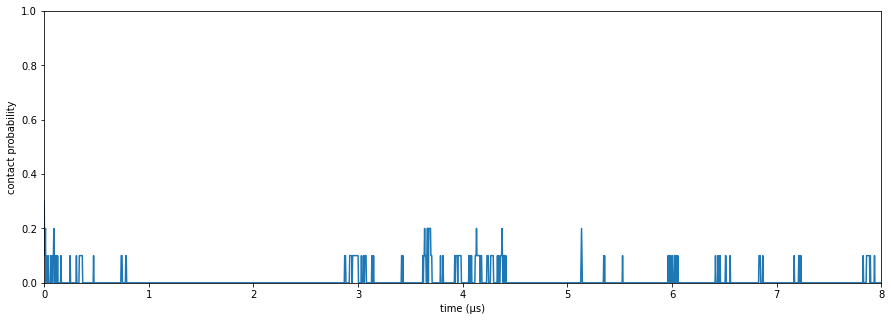

In [200]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(len(contact_prob))/1000*4,contact_prob/10)
plt.xlim([0,8])
plt.ylim([0,1])
plt.xlabel('time (µs)')
plt.ylabel('contact probability')



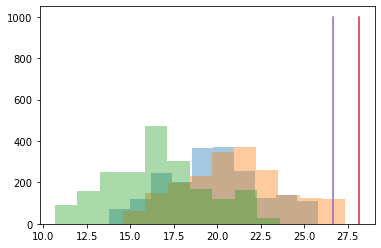

In [224]:
plt.hist(helix_cg_10[1,0,:],alpha=0.4)
plt.hist(helix_cg_10[1,1,:],alpha=0.4)
plt.hist(helix_cg_10[1,2,:],alpha=0.4)
plt.plot([np.mean(z_cell_mb_lower_10[2,:]),np.mean(z_cell_mb_lower_10[2,:])],[0,1000])
plt.plot([np.mean(z_cell_mb_lower_10[2,:])-1.52,np.mean(z_cell_mb_lower_10[2,:])-1.52],[0,1000])



In [16]:
plt.hist(helix_cg_10.ravel(),bins=50)
plt.plot([np.mean(z_cell_mb_lower_10[2,:]),np.mean(z_cell_mb_lower_10[2,:])],[0,1000])
plt.plot([np.mean(z_cell_mb_lower_10[2,:])-2*1.52,np.mean(z_cell_mb_lower_10[2,:])-2*1.52],[0,1000])

NameError: name 'helix_cg_10' is not defined

In [32]:
np.where(helix_cg_10_cali0[8,:]<1)

(array([ 740,  742,  746,  747,  748, 1036, 1037, 1038, 1069]),)

Text(0, 0.5, 'count')

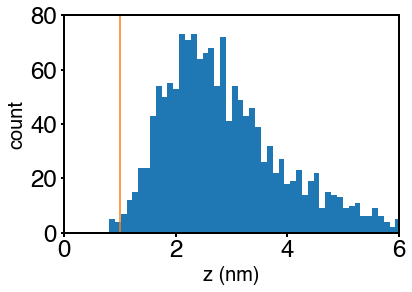

In [33]:
plt.figure()
plt.hist(helix_cg_10_cali2[8,:].ravel(),bins=50,alpha=1)
plt.plot([1,1],[0,80])
plt.ylim([0,80])
plt.xlim([0,6])
plt.xlabel('z (nm)')
plt.ylabel('count')

In [262]:
np.sum(helix_cg_10_cali[:,0,:].ravel()<2*1.52) / len(helix_cg_10_cali[:,0,:].ravel())

0.056466666666666665

In [264]:
np.sum(helix_cg_10_cali[:,1,:].ravel()<2*1.52) / len(helix_cg_10_cali[:,1,:].ravel())

0.14153333333333334

In [265]:
np.sum(helix_cg_10_cali[:,2,:].ravel()<2*1.52) / len(helix_cg_10_cali[:,2,:].ravel())

0.0158

In [23]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4

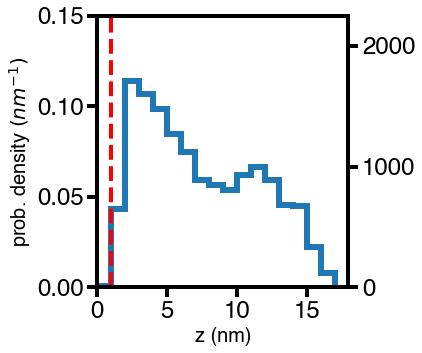

In [38]:
fig, ax1 = plt.subplots(figsize=(4.5,5))
plt.hist(helix_cg_10_cali2.ravel(),bins=np.linspace(0,17,18),density=True,alpha=1,histtype='step',lw=6)
plt.ylim([0,0.15])
plt.plot([1,1],[0,0.22],'r--',linewidth=4)
ax1.set_xticks([0,0.5,1])
ax1.set_yticks([0,0.05,0.1,0.15])
plt.xlim([0,18])
plt.ylabel('prob. density $(nm^{-1})$')
plt.xlabel('z (nm)')

ax2 = ax1.twinx()
plt.hist(helix_cg_10_cali2.ravel(),bins=np.linspace(0,17,18),density=False,alpha=1,histtype='step',lw=0)
plt.ylim([0,len(helix_cg_10_cali2.ravel())*0.15])
ax2.set_yticks([0,1000,2000])
ax2.set_xticks([0,5,10,15])





(0.0, 15.0)

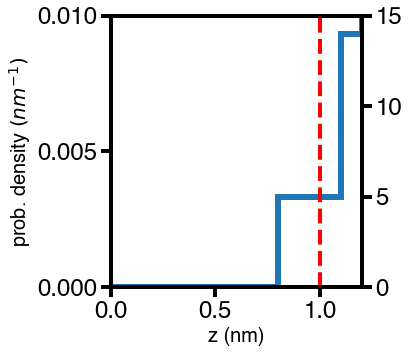

In [37]:
fig, ax1 = plt.subplots(figsize=(4.5,5))
plt.hist(aa,density=True,bins=np.linspace(0,18,181),linewidth=2,alpha=1,histtype='step',lw=6)
plt.xlim([0,1.2])
plt.ylim([0,0.01])
plt.plot([1,1],[0,0.2],'r--',linewidth=4)
ax1.set_yticks([0,0.005,0.01])
#plt.title('EI simulation',fontsize=28)
plt.ylabel('prob. density $(nm^{-1})$')
plt.xlabel('z (nm)')

ax2 = ax1.twinx()
plt.hist(helix_cg_10_cali2.ravel(),bins=np.linspace(0,18,181),density=False,alpha=1,histtype='step',lw=0)
plt.xlim([0,1.2])
plt.ylim([0,len(helix_cg_10_cali2.ravel())*0.01*0.1])
#ax2.set_yticks([0,60,120])
#ax2.set_xticks([0,5,10,15])


#plt.ylim([0,200])
#plt.fill_between([0,1.6],[0,0],[200,200],color = 'r',alpha=0.5)

In [55]:
len(helix_cg_10_cali2.ravel())

15000

In [37]:
np.sum(helix_cg_10_cali2.ravel()<1)/len(helix_cg_10_cali2.ravel())*100

0.06666666666666667

In [669]:
np.sum(helix_cg_10_cali2.ravel()<1.6)/60

3.066666666666667

In [673]:
1-np.sum(bb<1.6)/np.sum(aa<1.6)

0.6304347826086957

184

In [651]:
np.sum(helix_cg_10_cali2.ravel()<1.6)/(len(helix_cg_10_cali2.ravel())*4/1000)

3.066666666666667

In [650]:
len(helix_cg_10_cali2.ravel())

15000

In [61]:
np.sum(aa<1)

10

In [65]:
(43/10.434/4) / (1/54)

55.635422656699255

In [59]:
np.sum(bb<1)

1

In [32]:
bb = helix_cg_10_cali2[np.r_[:8,9],:].ravel()
aa = helix_cg_10_cali2.ravel()

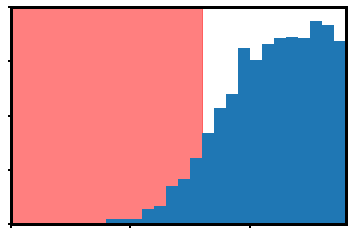

In [705]:
plt.hist(aa[aa<2.8],bins=np.linspace(0,2.8,29),alpha=1)
plt.xlim([0,2.8])
#plt.title('EI simulation',fontsize=28)
#plt.ylabel('count')
#plt.xlabel('z (nm)')
plt.ylim([0,200])
plt.fill_between([0,1.6],[0,0],[200,200],color = 'r',alpha=0.5)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
for axis in ['top','bottom','left','right']:
    plt.gca().spines[axis].set_linewidth(3)

Text(0.5, 0, 'z (nm)')

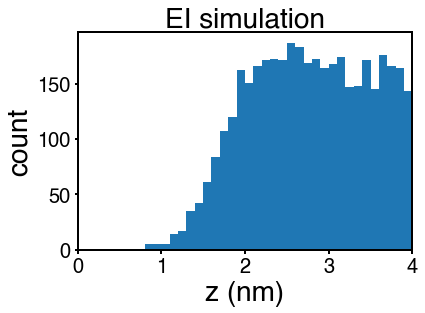

In [674]:
plt.hist(aa[aa<4],bins=np.linspace(0,4,41),alpha=1)
plt.xlim([0,4])
plt.title('EI simulation',fontsize=28)
plt.ylabel('count')
plt.xlabel('z (nm)')

Text(0.5, 0, 'z (nm)')

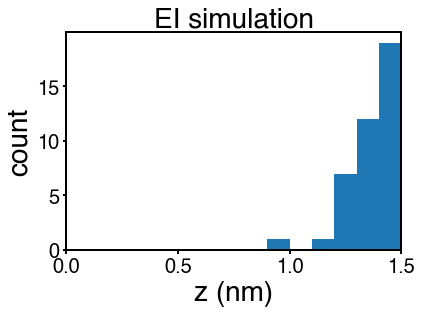

In [547]:
plt.hist(aa[aa<=1.5],bins=np.linspace(0,1.5,16),alpha=1)
plt.xlim([0,1.5])
plt.title('EI simulation',fontsize=28)
plt.ylabel('count')
plt.xlabel('z (nm)')

In [667]:
np.sum(bb<1.6)

68

In [664]:
68/54

1.2592592592592593

In [665]:
112 / 1.26

88.88888888888889